In [9]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [10]:
diabetes <- read_csv("https://raw.githubusercontent.com/jessicazhaojy/dsci100groupproject/main/diabetes.csv") |>
                     mutate(Outcome = as_factor(Outcome))
diabetes

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [11]:
diabetes_tidy <- diabetes |>
select(-Pregnancies, -BloodPressure, -SkinThickness) |>
filter(BMI != "0")

diabetes_tidy

Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
148,0,33.6,0.627,50,1
85,0,26.6,0.351,31,0
183,0,23.3,0.672,32,1
89,94,28.1,0.167,21,0
137,168,43.1,2.288,33,1
116,0,25.6,0.201,30,0
78,88,31.0,0.248,26,1
115,0,35.3,0.134,29,0
197,543,30.5,0.158,53,1


In [16]:
diabetes_split <- initial_split(diabetes_tidy, prop = 0.75, strata = Outcome)  
diabetes_training <- training(diabetes_split)   
diabetes_testing <- testing(diabetes_split)

diabetes_training
diabetes_testing

Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
89,94,28.1,0.167,21,0
116,0,25.6,0.201,30,0
115,0,35.3,0.134,29,0
110,0,37.6,0.191,30,0
139,0,27.1,1.441,57,0
103,83,43.3,0.183,33,0
126,235,39.3,0.704,27,0
99,0,35.4,0.388,50,0
145,110,22.2,0.245,57,0


Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
85,0,26.6,0.351,31,0
168,0,38.0,0.537,34,1
166,175,25.8,0.587,51,1
118,230,45.8,0.551,31,1
107,0,29.6,0.254,31,1
97,140,23.2,0.487,22,0
122,0,27.6,0.512,45,0
103,192,24.0,0.966,33,0
138,0,33.2,0.420,35,0


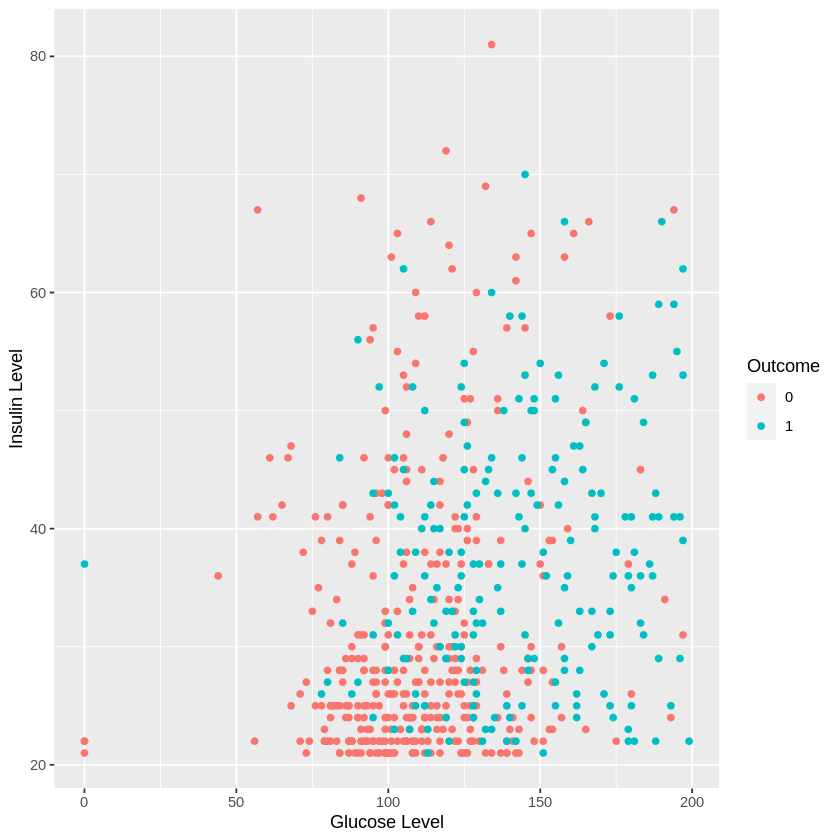

In [19]:
glucose_graph <- ggplot(diabetes_training, aes(x=Glucose, y= Age, colour = Outcome))+
                        geom_point() +
                        labs(x="Glucose Level", y= "Insulin Level")
glucose_graph
